In [1]:
from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("divorce.csv")

In [3]:
df.head()

Sorry_end  Ignore_diff  begin_correct  Contact  Special_time  No_home_time  \
0          2            2              4        1             0             0   
1          4            4              4        4             4             0   
2          2            2              2        2             1             3   
3          3            2              3        2             3             3   
4          2            2              1        1             1             1   

   2_strangers  enjoy_holiday  enjoy_travel  common_goals  ...  \
0            0              0             0             0  ...   
1            0              4             4             4  ...   
2            2              1             1             2  ...   
3            3              3             3             3  ...   
4            0              0             0             0  ...   

   silence_for_harm  silence_fear_anger  I'm_right  accusations  \
0                 2                   1          3            3   
1                 2                   2          3            4   
2                 3                   2          3            1   
3                 2                   2          3            3   
4                 2                   1          2            3   

   I'm_not_guilty  I'm_not_wrong  no_hesitancy_inadequate  you're_inadequate  \
0               3              2                        3                  2   
1               4              4                        4                  2   
2               1              1                        2                  2   
3               3              3                        2                  2   
4               2              2                        2                  1   

   incompetence  Divorce_Y_N  
0             1            1  
1             2            1  
2             2            1  
3             2            1  
4             0            1  

[5 rows x 55 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Sorry_end                      170 non-null    int64
 1   Ignore_diff                    170 non-null    int64
 2   begin_correct                  170 non-null    int64
 3   Contact                        170 non-null    int64
 4   Special_time                   170 non-null    int64
 5   No_home_time                   170 non-null    int64
 6   2_strangers                    170 non-null    int64
 7   enjoy_holiday                  170 non-null    int64
 8   enjoy_travel                   170 non-null    int64
 9   common_goals                   170 non-null    int64
 10  harmony                        170 non-null    int64
 11  freeom_value                   170 non-null    int64
 12  entertain                      170 non-null    int64
 13  people_goals        

## Checking the statistical summary of the data

In [5]:
df.describe()

Sorry_end  Ignore_diff  begin_correct     Contact  Special_time  \
count  170.000000   170.000000     170.000000  170.000000    170.000000   
mean     1.776471     1.652941       1.764706    1.482353      1.541176   
std      1.627257     1.468654       1.415444    1.504327      1.632169   
min      0.000000     0.000000       0.000000    0.000000      0.000000   
25%      0.000000     0.000000       0.000000    0.000000      0.000000   
50%      2.000000     2.000000       2.000000    1.000000      1.000000   
75%      3.000000     3.000000       3.000000    3.000000      3.000000   
max      4.000000     4.000000       4.000000    4.000000      4.000000   

       No_home_time  2_strangers  enjoy_holiday  enjoy_travel  common_goals  \
count    170.000000   170.000000     170.000000    170.000000    170.000000   
mean       0.747059     0.494118       1.452941      1.458824      1.576471   
std        0.904046     0.898698       1.546371      1.557976      1.421529   
min        0.000000     0.000000       0.000000      0.000000      0.000000   
25%        0.000000     0.000000       0.000000      0.000000      0.000000   
50%        0.000000     0.000000       1.000000      1.000000      2.000000   
75%        1.000000     1.000000       3.000000      3.000000      3.000000   
max        4.000000     4.000000       4.000000      4.000000      4.000000   

       ...  silence_for_harm  silence_fear_anger   I'm_right  accusations  \
count  ...        170.000000          170.000000  170.000000   170.000000   
mean   ...          2.552941            2.270588    2.741176     2.382353   
std    ...          1.371786            1.586841    1.137348     1.511587   
min    ...          0.000000            0.000000    0.000000     0.000000   
25%    ...          2.000000            1.000000    2.000000     1.000000   
50%    ...          3.000000            2.000000    3.000000     3.000000   
75%    ...          4.000000            4.000000    4.000000     4.000000   
max    ...          4.000000            4.000000    4.000000     4.000000   

       I'm_not_guilty  I'm_not_wrong  no_hesitancy_inadequate  \
count      170.000000     170.000000               170.000000   
mean         2.429412       2.476471                 2.517647   
std          1.405090       1.260238                 1.476537   
min          0.000000       0.000000                 0.000000   
25%          1.000000       2.000000                 1.000000   
50%          2.000000       3.000000                 3.000000   
75%          4.000000       4.000000                 4.000000   
max          4.000000       4.000000                 4.000000   

       you're_inadequate  incompetence  Divorce_Y_N  
count         170.000000    170.000000   170.000000  
mean            2.241176      2.011765     0.494118  
std             1.505634      1.667611     0.501442  
min             0.000000      0.000000     0.000000  
25%             1.000000      0.000000     0.000000  
50%             2.000000      2.000000     0.000000  
75%             4.000000      4.000000     1.000000  
max             4.000000      4.000000     1.000000  

[8 rows x 55 columns]

## Getting the total numbers of divorced and married people among the respondents

In [6]:
df['Divorce_Y_N'].value_counts()

0    86
1    84
Name: Divorce_Y_N, dtype: int64

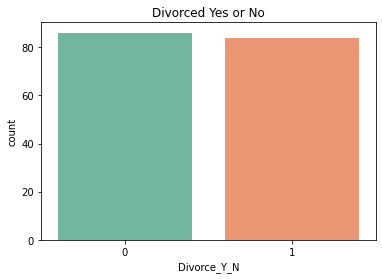

In [7]:
sns.countplot(df['Divorce_Y_N'], palette='Set2')
plt.title('Divorced Yes or No');

## Getting the summary profile of the data set using profile report

In [8]:
df.profile_report()

In [9]:
df.corr()

Sorry_end  Ignore_diff  begin_correct  \
Sorry_end                       1.000000     0.819066       0.832508   
Ignore_diff                     0.819066     1.000000       0.805876   
begin_correct                   0.832508     0.805876       1.000000   
Contact                         0.825066     0.791313       0.806709   
Special_time                    0.881272     0.819360       0.800774   
No_home_time                    0.287140     0.102843       0.263032   
2_strangers                     0.427989     0.417616       0.464071   
enjoy_holiday                   0.802357     0.864284       0.757264   
enjoy_travel                    0.845916     0.827711       0.816653   
common_goals                    0.790183     0.782286       0.753017   
harmony                         0.892253     0.823380       0.805915   
freeom_value                    0.794307     0.862835       0.780258   
entertain                       0.842996     0.791073       0.758969   
people_goals                    0.817099     0.875800       0.750602   
dreams                          0.848754     0.801316       0.806909   
love                            0.831822     0.806497       0.775528   
happy                           0.895970     0.822317       0.808161   
marriage                        0.853739     0.883856       0.797395   
roles                           0.900446     0.829422       0.798999   
trust                           0.840966     0.884176       0.807892   
likes                           0.815708     0.790468       0.796069   
care_sick                       0.785280     0.795406       0.727933   
fav_food                        0.822534     0.773018       0.706585   
stresses                        0.813233     0.868240       0.740476   
inner_world                     0.822084     0.769244       0.724506   
anxieties                       0.803507     0.861421       0.728653   
current_stress                  0.829037     0.817364       0.797595   
hopes_wishes                    0.762102     0.776943       0.689914   
know_well                       0.858139     0.789827       0.755491   
friends_social                  0.792257     0.844007       0.752391   
Aggro_argue                     0.699223     0.661210       0.652188   
Always_never                    0.739679     0.735763       0.747669   
negative_personality            0.799735     0.757286       0.726481   
offensive_expressions           0.749774     0.714360       0.702500   
insult                          0.796413     0.753566       0.730290   
humiliate                       0.812867     0.781295       0.744390   
not_calm                        0.786890     0.747088       0.736984   
hate_subjects                   0.804129     0.751705       0.740642   
sudden_discussion               0.817035     0.787768       0.759820   
idk_what's_going_on             0.838355     0.788200       0.781657   
calm_breaks                     0.804182     0.780757       0.739967   
argue_then_leave                0.642307     0.648539       0.569293   
silent_for_calm                 0.482223     0.503894       0.385152   
good_to_leave_home              0.752972     0.699765       0.661830   
silence_instead_of_discussion   0.510160     0.489062       0.427409   
silence_for_harm                0.400296     0.389519       0.308149   
silence_fear_anger              0.582693     0.616884       0.544863   
I'm_right                       0.633564     0.643762       0.638256   
accusations                     0.674843     0.659841       0.647961   
I'm_not_guilty                  0.725443     0.680538       0.663995   
I'm_not_wrong                   0.684143     0.636558       0.600603   
no_hesitancy_inadequate         0.575463     0.536294       0.491803   
you're_inadequate               0.611422     0.610726       0.598749   
incompetence                    0.768522     0.728897       0.673012   
Divorce_Y_N                     0.861324     0.820774       0.806709   

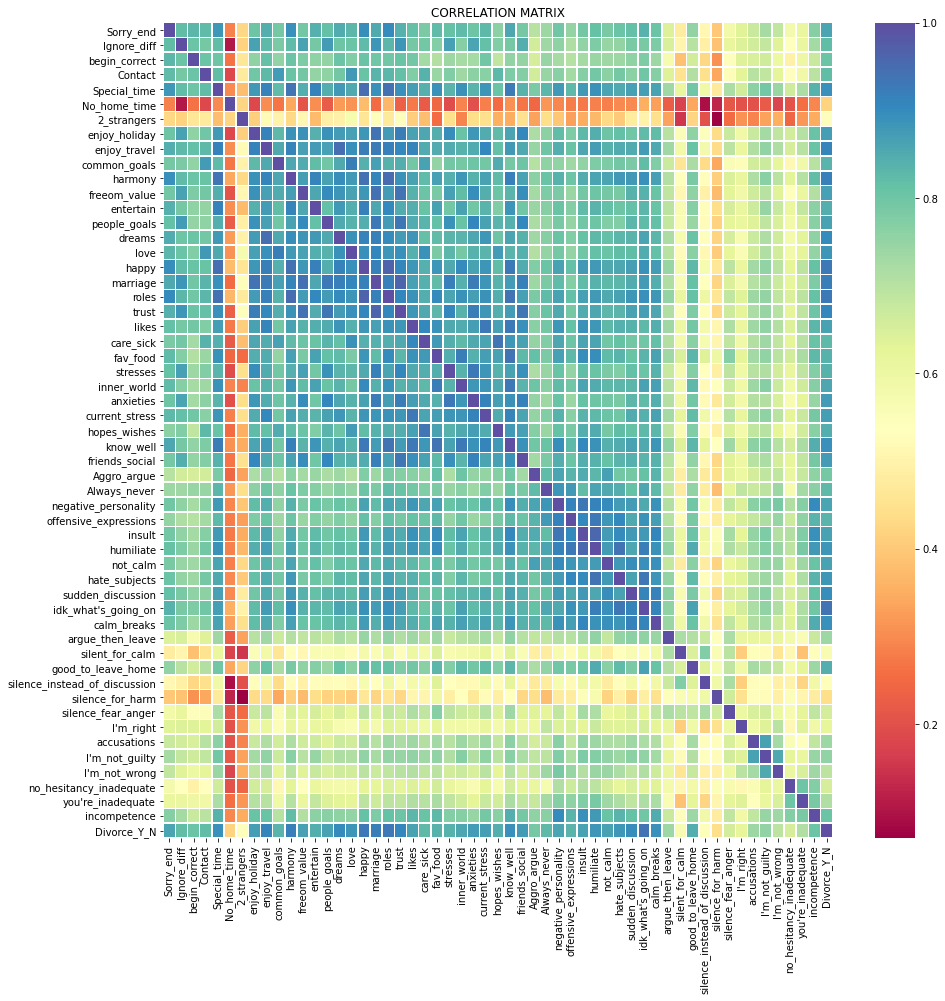

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='Spectral', linewidths=.5)
plt.title('CORRELATION MATRIX');

### The heatmap revealed that a lot of the columns are highly correlated with the divorced column

In [11]:
df.columns

Index(['Sorry_end', 'Ignore_diff', 'begin_correct', 'Contact', 'Special_time',
       'No_home_time', '2_strangers', 'enjoy_holiday', 'enjoy_travel',
       'common_goals', 'harmony', 'freeom_value', 'entertain', 'people_goals',
       'dreams', 'love', 'happy', 'marriage', 'roles', 'trust', 'likes',
       'care_sick', 'fav_food', 'stresses', 'inner_world', 'anxieties',
       'current_stress', 'hopes_wishes', 'know_well', 'friends_social',
       'Aggro_argue', 'Always_never', 'negative_personality',
       'offensive_expressions', 'insult', 'humiliate', 'not_calm',
       'hate_subjects', 'sudden_discussion', 'idk_what's_going_on',
       'calm_breaks', 'argue_then_leave', 'silent_for_calm',
       'good_to_leave_home', 'silence_instead_of_discussion',
       'silence_for_harm', 'silence_fear_anger', 'I'm_right', 'accusations',
       'I'm_not_guilty', 'I'm_not_wrong', 'no_hesitancy_inadequate',
       'you're_inadequate', 'incompetence', 'Divorce_Y_N'],
      dtype='object')

## Couples who apologize 

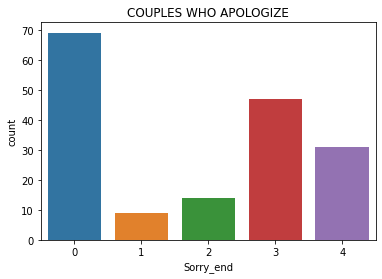

In [12]:
sns.countplot(df['Sorry_end'])
plt.title('COUPLES WHO APOLOGIZE');

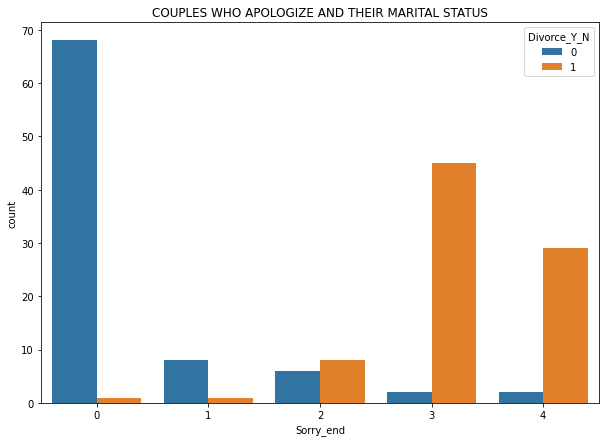

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(x='Sorry_end', hue='Divorce_Y_N', data=df, palette='tab10')
plt.title('COUPLES WHO APOLOGIZE AND THEIR MARITAL STATUS');

### This data is interesting as it revealed that a lot of couples tend to continue to argue even after one of them have apologized with a large proportion staying married. The ones who tend to sweep everything under the carpet after an apology by either of them have a higher number of divorced couples. This implies that it is better to get to the root of every arguement to build a healthy relationship as an apology is not enough.

## Couples who can ignore their differences

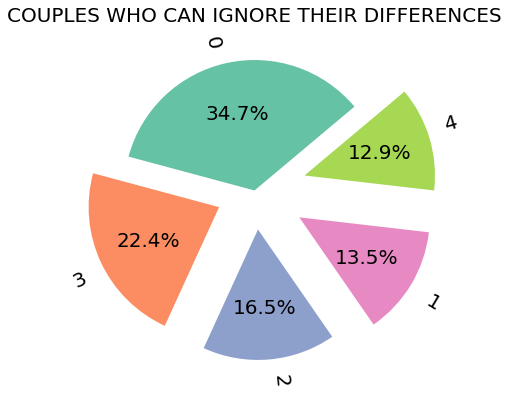

In [14]:
plt.subplots(figsize=(6,6))
data=df['Ignore_diff']
explode=[0,0.3,0.3,0.4,0.4]
data.value_counts().plot.pie(autopct='%1.1f%%', fontsize=20, colors=sns.color_palette('Set2',10), startangle=40,
                            explode=explode, rotatelabels='true')
plt.title('COUPLES WHO CAN IGNORE THEIR DIFFERENCES', fontsize=20)
plt.ylabel('');

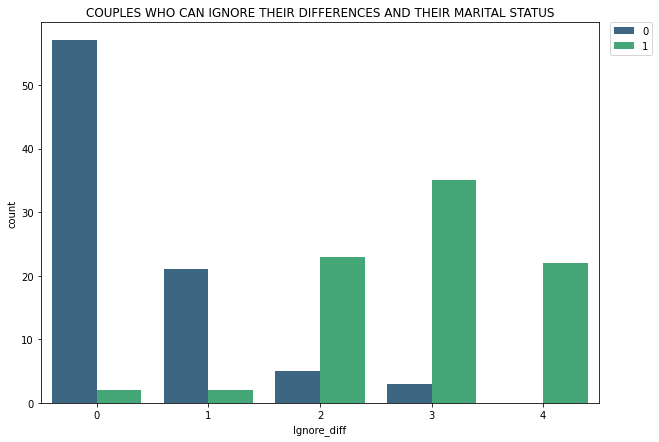

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(x='Ignore_diff', hue='Divorce_Y_N', data=df, palette='viridis')
plt.title('COUPLES WHO CAN IGNORE THEIR DIFFERENCES AND THEIR MARITAL STATUS')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);

### Couples who aren't able to overlook their differences without acknowledging it tend to stay married

## Time spent with my wife is special

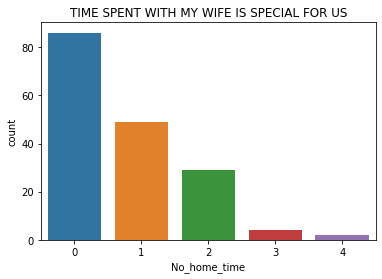

In [16]:
sns.countplot(x=df['No_home_time'])
plt.title('TIME SPENT WITH MY WIFE IS SPECIAL FOR US');

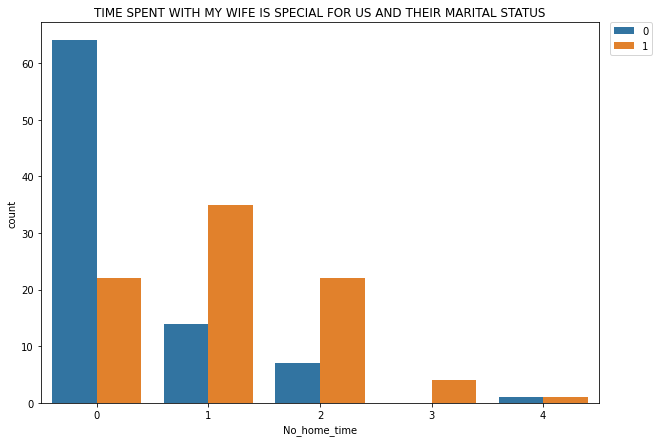

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(x='No_home_time', hue='Divorce_Y_N', data=df, palette='tab10')
plt.title('TIME SPENT WITH MY WIFE IS SPECIAL FOR US AND THEIR MARITAL STATUS')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);

### Another interesting detail here as a high percentage of husbands believe that the time spent with their wives isn't special for them and they tend to stay married

## Couples who don't have time at home 

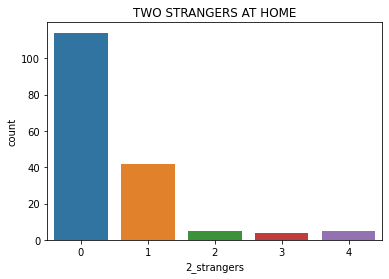

In [18]:
sns.countplot(x=df['2_strangers'])
plt.title('TWO STRANGERS AT HOME');

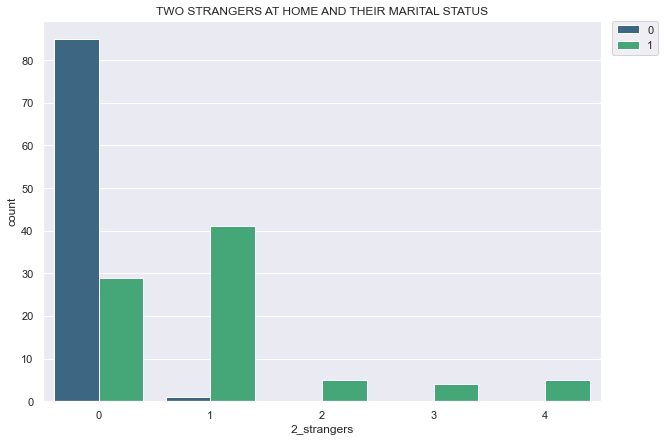

In [19]:
plt.figure(figsize=(10,7))
sns.set_theme(style='darkgrid')
sns.countplot(x='2_strangers', hue='Divorce_Y_N', data=df, palette='viridis')
plt.title('TWO STRANGERS AT HOME AND THEIR MARITAL STATUS')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);

### Spending quality time together with loved ones improves and enhances relationships amongst individuals so it no surprise that couples who create time for themselves have a higher proportion of married couples as revealed by the data.

## COUPLES WHO USE OFFENSIVE EXPRESSIONS DURING ARGUMENTS

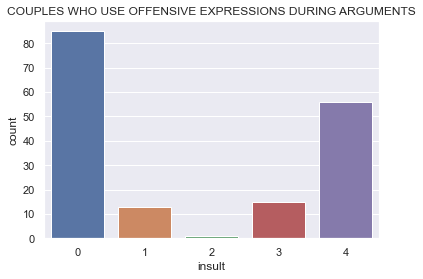

In [20]:
sns.countplot(df['insult'])
plt.title('COUPLES WHO USE OFFENSIVE EXPRESSIONS DURING ARGUMENTS');

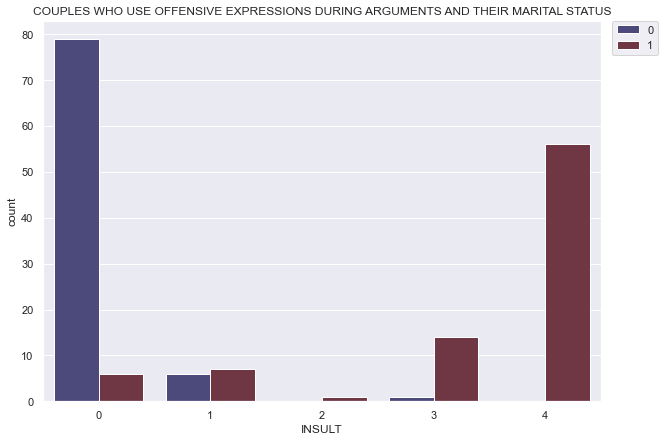

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(x='insult', hue='Divorce_Y_N', data=df, palette='icefire')
plt.xlabel('INSULT')
plt.title('COUPLES WHO USE OFFENSIVE EXPRESSIONS DURING ARGUMENTS AND THEIR MARITAL STATUS')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);

### The data revealed that couples who restrain themselves from using offensive statements or expressions on one another stay married while the opposite is true for those who choose offensive statements.

## silent_for_calm

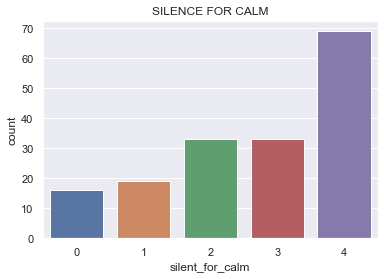

In [22]:
sns.countplot(df['silent_for_calm'])
plt.title('SILENCE FOR CALM');

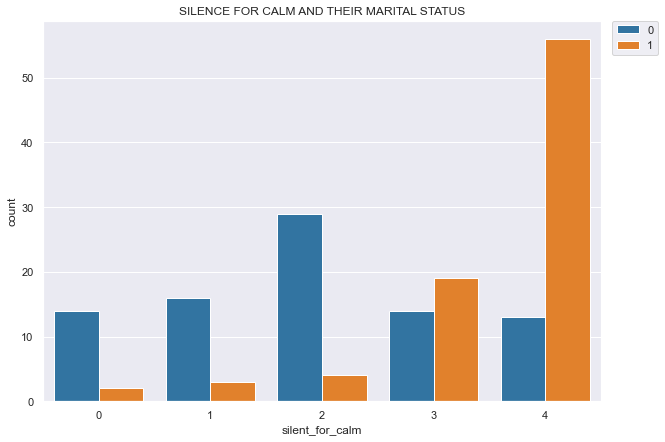

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(x='silent_for_calm', hue='Divorce_Y_N', data=df, palette='tab10')
plt.xlabel('silent_for_calm')
plt.title('SILENCE FOR CALM AND THEIR MARITAL STATUS')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);

### The data revealed a high proportion of husbands choose not to always avoid arguments with their wives, and this has resulted in high number of divorced rates among couples.

## silence_instead_of_discussion

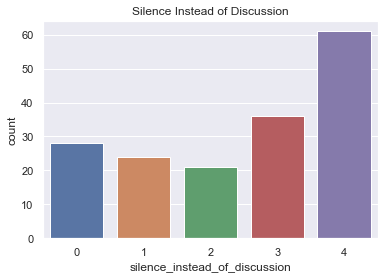

In [24]:
sns.countplot(df['silence_instead_of_discussion'])
plt.title('Silence Instead of Discussion');

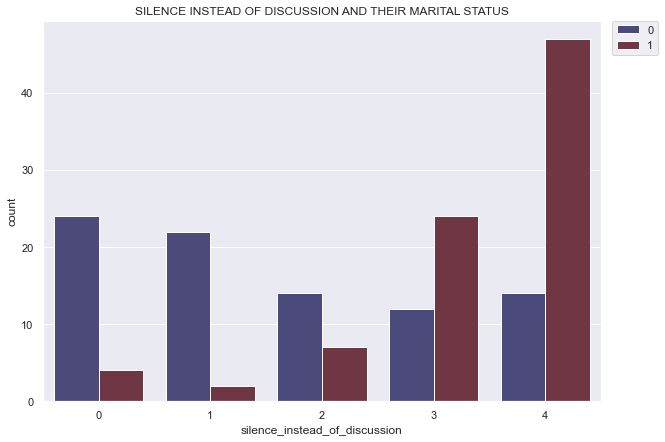

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(x='silence_instead_of_discussion', hue='Divorce_Y_N', data=df, palette='icefire')
plt.xlabel('silence_instead_of_discussion')
plt.title('SILENCE INSTEAD OF DISCUSSION AND THEIR MARITAL STATUS')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);

### A lot of partners believe the right thing is to leave home but these have resulted in a higher proportion of seperated homes as revealed by the data.

## Couples who stay silent rather than discuss with their spouses

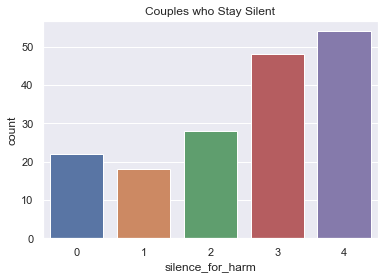

In [26]:
sns.countplot(df['silence_for_harm'])
plt.title('Couples who Stay Silent');

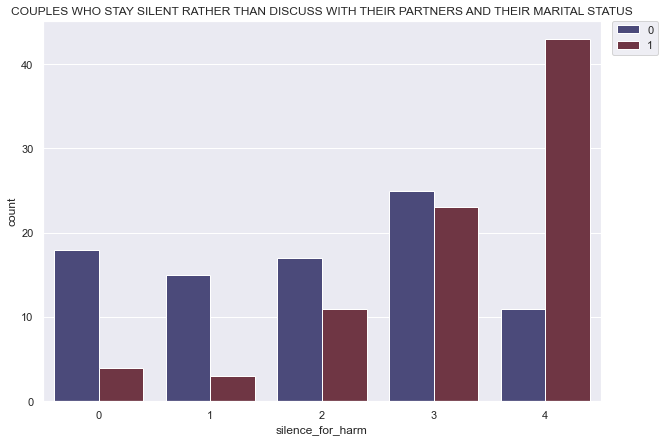

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(x='silence_for_harm', hue='Divorce_Y_N', data=df, palette='icefire')
plt.xlabel('silence_for_harm')
plt.title('COUPLES WHO STAY SILENT RATHER THAN DISCUSS WITH THEIR PARTNERS AND THEIR MARITAL STATUS')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);

### A lot of couple chose silence rather than have a conversation with their spouses and this in turn lead to an increase in the divorce rate among married couples as revealed in the graphs above.

## MODELLING

### Using Logistic Regression to build the model for predicting divorce

### There's a high volume of multicollinearity among the columns from the correlation table so only columns with low correlation will be selected

In [28]:
X = df[['Sorry_end', 'No_home_time', '2_strangers', 'Aggro_argue', 'argue_then_leave', 'silent_for_calm',
       "I'm_right", "accusations", "I'm_not_guilty", "no_hesitancy_inadequate", "you're_inadequate"]]
y= df['Divorce_Y_N']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
predictions = model.predict(X_test)
predictions

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        23

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



In [33]:
cnf_matrix = confusion_matrix(y_test, predictions)
cnf_matrix

array([[28,  0],
       [ 0, 23]], dtype=int64)

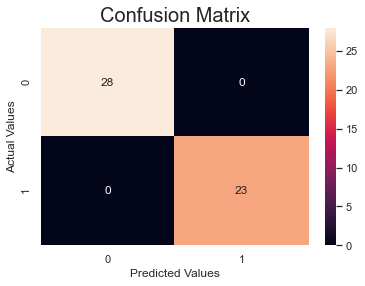

In [34]:
ax = sns.heatmap(cnf_matrix, annot=True)
ax.set_title('Confusion Matrix', fontsize=20)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Logit model to check the p-value of the selected columns

In [35]:
logit = sm.Logit(y, X)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.123964
         Iterations 10


In [36]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:            Divorce_Y_N   No. Observations:                  170
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                           10
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                  0.8211
Time:                        15:03:59   Log-Likelihood:                -21.074
converged:                       True   LL-Null:                       -117.82
Covariance Type:            nonrobust   LLR p-value:                 3.654e-36
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Sorry_end                   2.7168      0.704      3.859      0.000       1.337       4.097
No_home_time                1.2971      0.757      1.714      0.086      -0.186       2.780


## Choosing columns that are significant by checking their p-values

In [37]:
X = df[["Sorry_end", "2_strangers", "argue_then_leave", "silent_for_calm", "I'm_right", "accusations"]]
y = df['Divorce_Y_N']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.96      1.00      0.98        23

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



In [42]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[27,  1],
       [ 0, 23]], dtype=int64)

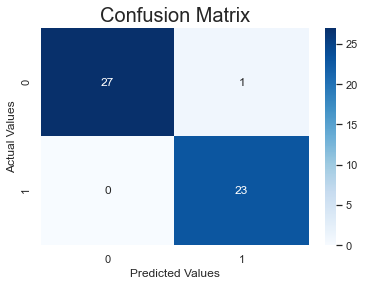

In [43]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix', fontsize=20)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

In [44]:
logit = sm.Logit(y, X)
logit_model = logit.fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.154024
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:            Divorce_Y_N   No. Observations:                  170
Model:                          Logit   Df Residuals:                      164
Method:                           MLE   Df Model:                            5
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                  0.7778
Time:                        15:04:01   Log-Likelihood:                -26.184
converged:                       True   LL-Null:                       -117.82
Covariance Type:            nonrobust   LLR p-value:                 1.067e-37
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Sorry_end            1.9765      0.404      4.892      0.000       1.185       2.768
2_stranger

### The pseudo R-squared value is significantly above the threshold of 0.2, -0.4 with a value of 0.7778 and the LLR p-value indicates the model is strong enough and far lower than 0.05

### The coefficients of the independent variables are represented by "Sorry_end", "2_strangers", "argue_then_leave", "silent_for_calm", "I'm_right", "accusations". 